In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Statistical Analysis**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Checking for NULL values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Exploratory Data Analysis

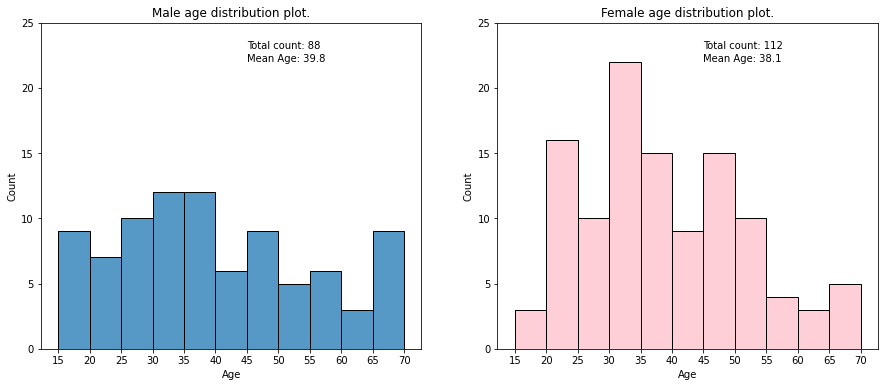

In [6]:
# Numbers of age group in both the genders

plt.figure(figsize=(15,6))

plt.subplot(121)
sns.histplot(df[df['Gender']=='Male']['Age'], bins=range(15,75,5))
plt.title("Male age distribution plot.")
plt.ylim(top=25)
plt.xticks(range(15,75,5))
plt.text(45,23,"Total count: {}".format(df[df['Gender'] == 'Male']['Age'].count()))
plt.text(45,22,"Mean Age: {:.1f}".format(df[df['Gender'] == 'Male']['Age'].mean()))

plt.subplot(122)
sns.histplot(df[df['Gender']=='Female']['Age'], bins=range(15,75,5), color='Pink')
plt.title("Female age distribution plot.")
plt.ylim(top=25)
plt.xticks(range(15,75,5))
plt.text(45,23,"Total count: {}".format(df[df['Gender'] == 'Female']['Age'].count()))
plt.text(45,22,"Mean Age: {:.1f}".format(df[df['Gender'] == 'Female']['Age'].mean()))

plt.show()

**After comparing both the graphs, we can conclude that the maximun numbers of age group is between 30 to 40 for both Male and Female.The distrubution of male graph is more uniform as compared to the Female graph. Also the average age of Male customers are higher as compared to female customers.**



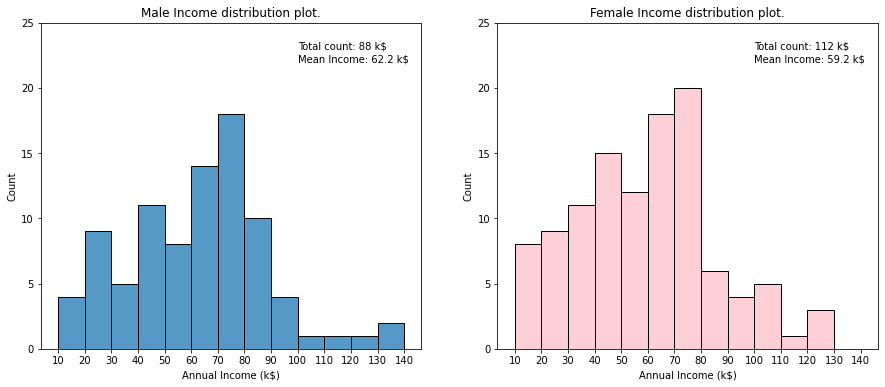

In [7]:
# Numbers of age group in both the genders

plt.figure(figsize=(15,6))

plt.subplot(121)
sns.histplot(df[df['Gender']=='Male']['Annual Income (k$)'], bins=range(10,150,10))
plt.title("Male Income distribution plot.")
plt.ylim(top=25)
plt.xticks(range(10,150,10))
plt.text(100,23,"Total count: {} k$".format(df[df['Gender'] == 'Male']['Annual Income (k$)'].count()))
plt.text(100,22,"Mean Income: {:.1f} k$".format(df[df['Gender'] == 'Male']['Annual Income (k$)'].mean()))

plt.subplot(122)
sns.histplot(df[df['Gender']=='Female']['Annual Income (k$)'], bins=range(10,150,10), color='Pink')
plt.title("Female Income distribution plot.")
plt.ylim(top=25)
plt.xticks(range(10,150,10))
plt.text(100,23,"Total count: {} k$".format(df[df['Gender'] == 'Female']['Annual Income (k$)'].count()))
plt.text(100,22,"Mean Income: {:.1f} k$".format(df[df['Gender'] == 'Female']['Annual Income (k$)'].mean()))

plt.show()

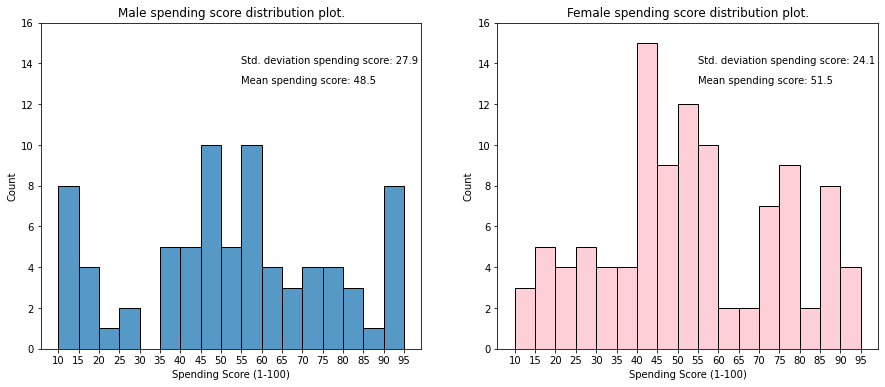

In [8]:
plt.figure(figsize=(15,6))

plt.subplot(121)
sns.histplot(df[df['Gender']=='Male']['Spending Score (1-100)'], bins=range(10,100,5))
plt.title("Male spending score distribution plot.")
plt.ylim(top=16)
plt.text(55,14,"Std. deviation spending score: {:.1f} ".format(df[df['Gender'] == 'Male']['Spending Score (1-100)'].std()))
plt.text(55,13,"Mean spending score: {:.1f} ".format(df[df['Gender'] == 'Male']['Spending Score (1-100)'].mean()))
plt.xticks(range(10,100,5))

plt.subplot(122)
sns.histplot(df[df['Gender']=='Female']['Spending Score (1-100)'], bins=range(10,100,5), color='Pink')
plt.title("Female spending score distribution plot.")
plt.ylim(top=16)
plt.text(55,14,"Std. deviation spending score: {:.1f} ".format(df[df['Gender'] == 'Female']['Spending Score (1-100)'].std()))
plt.text(55,13,"Mean spending score: {:.1f} ".format(df[df['Gender'] == 'Female']['Spending Score (1-100)'].mean()))
plt.xticks(range(10,100,5))
plt.show()

**From the graphs, we can see that mean spending score of a female group is higher compared to the male group. 
Also the std deviation of male is higher than female group.**

In [9]:
median_data = df.groupby(['Gender', pd.cut(df['Age'], range(15,75,5))]).median()
median_data.index = median_data.index.set_names(['Gender','Age_group'])
median_data.reset_index(inplace=True)
median_data.head()

,Gender,Age_group,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,Female,"(15, 20]",112.0,19.0,63.0,50.0
1,Female,"(20, 25]",46.0,23.0,39.0,65.0
2,Female,"(25, 30]",139.5,29.0,74.5,73.0
3,Female,"(30, 35]",126.0,32.0,70.0,69.0
4,Female,"(35, 40]",138.5,38.0,73.5,41.0


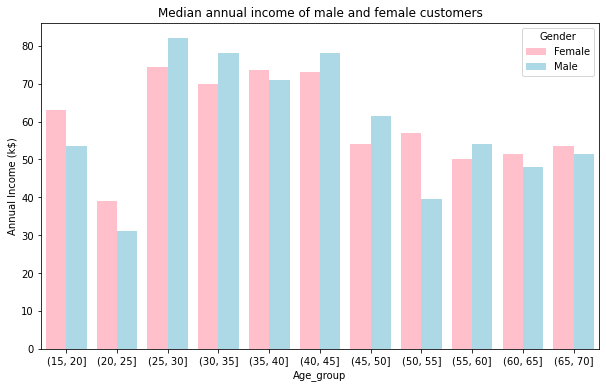

In [80]:
plt.figure(figsize=(10,6))
sns.barplot(y='Annual Income (k$)', x='Age_group', hue='Gender',data=median_data,
            palette=['pink', 'lightblue'], saturation=1)
plt.title("Median annual income of male and female customers")
plt.show()

C:\Users\VAISHNAV\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

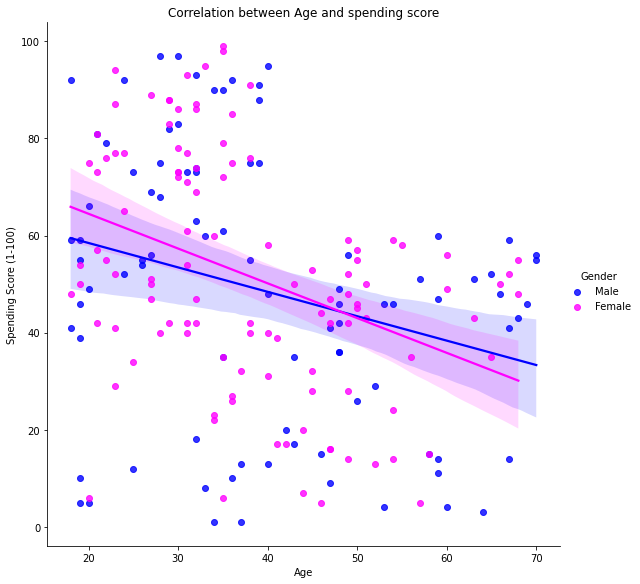

In [73]:
plt.figure(figsize=(10,8))
sns.lmplot(x ='Age',y = 'Spending Score (1-100)', data=df, hue='Gender', palette=['blue', 'magenta'], size=8)
plt.title('Correlation between Age and spending score')
plt.show()

**We can see that there is negative correlation between age and spending score for both genders**

C:\Users\VAISHNAV\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

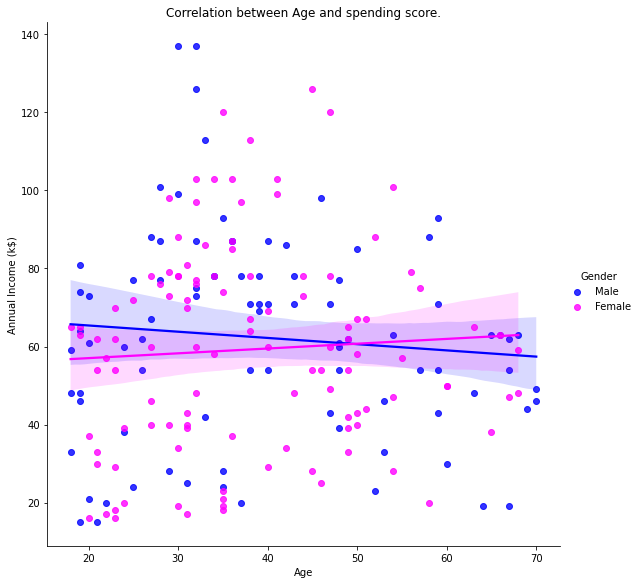

In [74]:
plt.figure(figsize=(10,8))
sns.lmplot(x ='Age',y = 'Annual Income (k$)', data=df, hue='Gender', palette=['blue', 'magenta'], size=8)
plt.title("Correlation between Age and spending score.")
plt.show()

**We can see that there is neglegible correlation between age and annual Income for both genders**

### Data Transformation

In [13]:
x = df.iloc[:,3:].values

In [14]:
# Data Transformation using Normalization technique
from sklearn.preprocessing import MinMaxScaler

In [15]:
scalar = MinMaxScaler()
df_n = scalar.fit_transform(x)

### Data Modelling using K-Means algorithm (2D)

In [16]:
from sklearn.cluster import KMeans

C:\Users\VAISHNAV\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


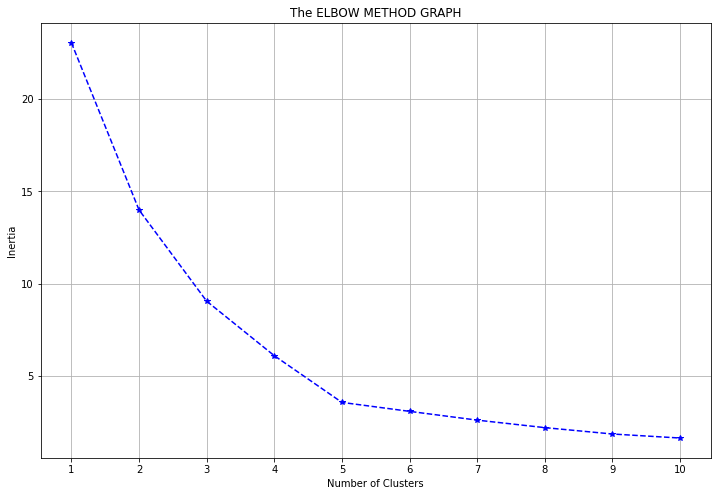

In [17]:
# Finding the optimal number of clusters using elbow method
wcss = []
for i in range(1,11,1):    
    km = KMeans(n_clusters=i, init='k-means++',random_state=42)
    km.fit(df_n)
    wcss.append(km.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss, ls = '--', color = 'blue', marker = '*')
plt.title("The ELBOW METHOD GRAPH")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(range(1,11,1))
plt.grid(True)
plt.show()

**We can see an elbow at the point 5, therefore we will take the number of clusters to be 5** 

In [18]:
km_5 = KMeans(n_clusters=5, init='k-means++',random_state=42)
y_5 = km_5.fit_predict(df_n)

In [19]:
df_n5 = df.copy()
df_n5['Label'] = y_5
df_n5.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


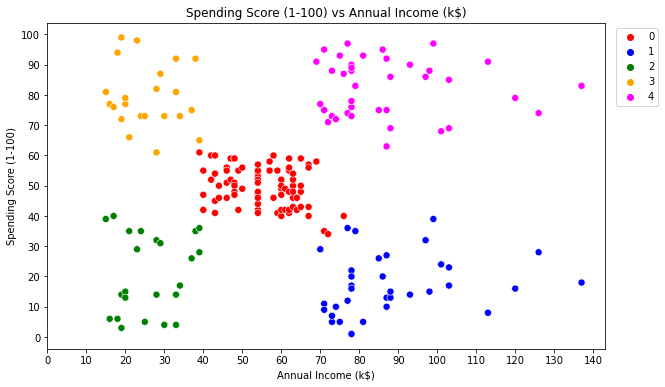

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="Label",  
                 palette=['red','blue','green','orange','magenta'],
                legend='full',data = df_n5 ,s = 50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.legend(bbox_to_anchor=(1.01,1))
plt.xticks(range(0,141,10))
plt.yticks(range(0,101,10))
plt.show()

In [21]:
from sklearn.metrics import silhouette_score
s_score = silhouette_score(df_n, y_5)
s_score

0.5594854531227246

### Data Modelling using K-Means algorithm (3D)

In [22]:
x_3d = df.iloc[:,2:].values
df_3d = scalar.fit_transform(x_3d)

C:\Users\VAISHNAV\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


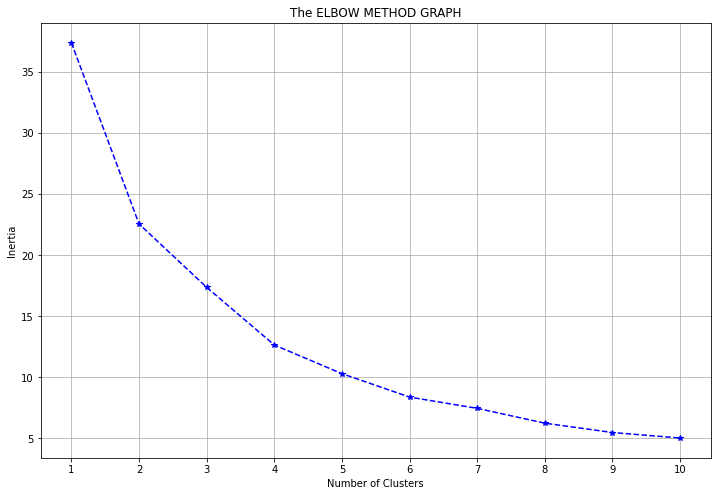

In [23]:
wcss_3d = []
for i in range(1,11,1):    
    km = KMeans(n_clusters=i, init='k-means++',random_state=42)
    km.fit(df_3d)
    wcss_3d.append(km.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss_3d, ls = '--', color = 'blue', marker = '*')
plt.title("The ELBOW METHOD GRAPH")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(range(1,11,1))
plt.grid(True)
plt.show()

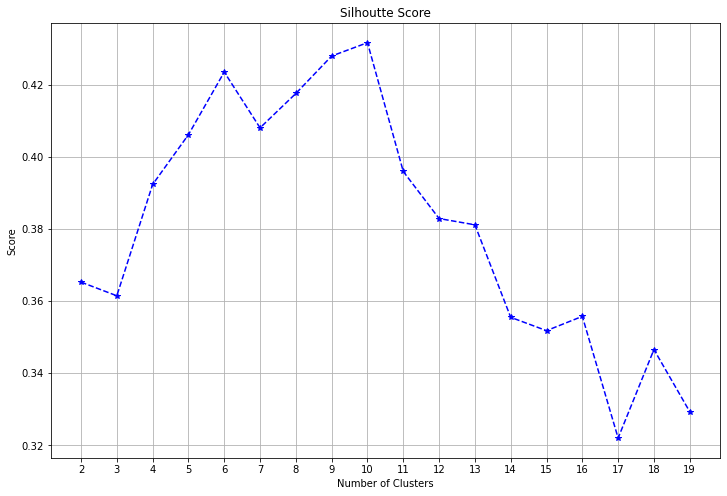

In [137]:
sil_score = []
for i in range(2,20,1):
    km_3d = KMeans(n_clusters=i, init='k-means++',random_state=42)
    y_3d = km_3d.fit_predict(df_3d)
    sil_score.append(silhouette_score(df_3d, y_3d))
    
plt.figure(figsize=(12,8))
plt.plot(range(2,20), sil_score, ls = '--', color = 'blue', marker = '*')
plt.title("Silhoutte Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.xticks(range(2,20,1))
plt.grid(True)
plt.show()

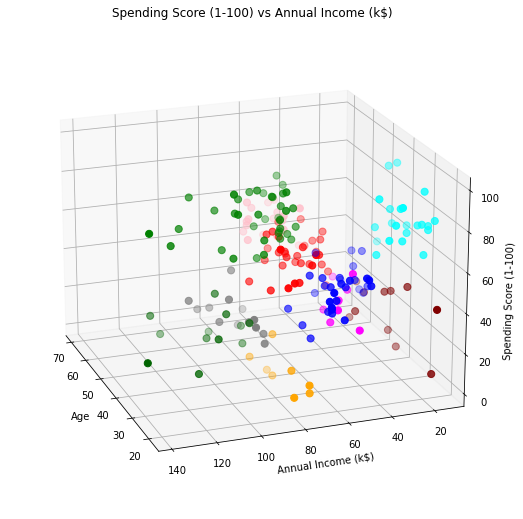

In [25]:
km_3d = KMeans(n_clusters=10, init='k-means++',random_state=42)
y_n6_3d = km_3d.fit_predict(df_3d)

df_n6 = df.copy()
df_n6['Label'] = y_n6_3d

fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(projection = '3d')

pallete = ['red','blue','green','orange','magenta','cyan','pink','darkgreen','maroon','gray']
for i in range(0,10):
    ax.scatter(df_n6.Age[df_n6.Label == i], 
               df_n6['Annual Income (k$)'][df_n6.Label == i],
               df_n6['Spending Score (1-100)'][df_n6.Label == i], c = pallete[i], s = 50)

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
ax.view_init(20,160)
plt.show()

In [115]:
import plotly.express as px

fig = px.scatter_3d(df_n6, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', labels='Label', color = 'Label')
fig.show()


**DBSCAN**

In [26]:
from sklearn.cluster import DBSCAN

In [34]:
eps_values= np.arange(8,13,0.5)
min_samples = np.arange(3,11)

dbs_param = []
for i in eps_values:
    for j in min_samples:
        dbs_param.append((i,j))

        
no_cluster = []
sil_score_dbscan = []
for i in dbs_param:
    dbs_cluster = DBSCAN(eps=i[0], min_samples=i[1]).fit(x)
    no_cluster.append(len(np.unique(dbs_cluster.labels_)))
    sil_score_dbscan.append(round(silhouette_score(x, dbs_cluster.labels_), 2))



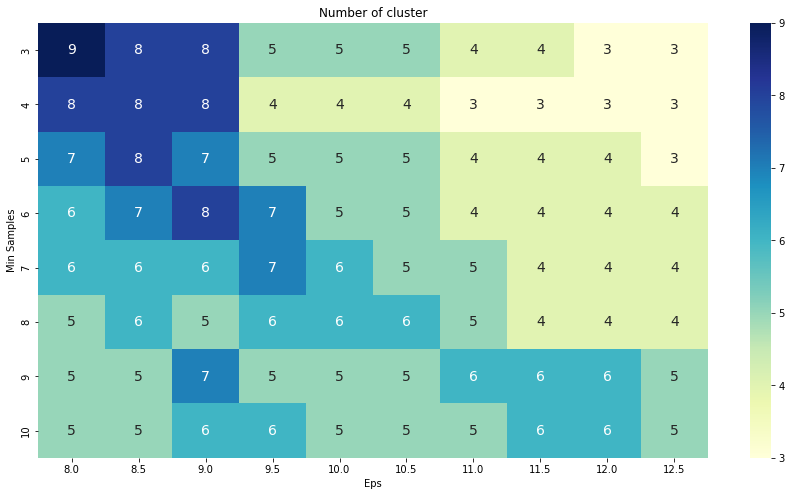

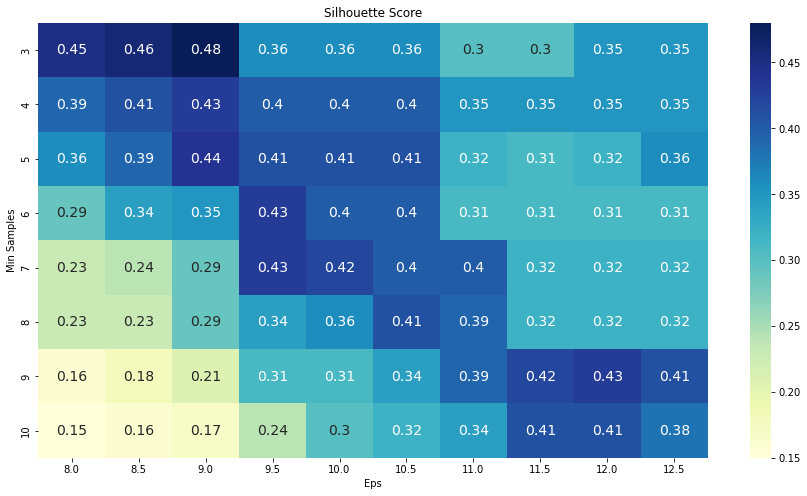

In [138]:
tmp = pd.DataFrame.from_records(dbs_param, columns=['Eps', 'Min Samples'])
tmp['No_of_clusters'] = no_cluster
tmp['sil_score'] = sil_score_dbscan
pivot = pd.pivot_table(tmp, values='No_of_clusters', index='Min Samples', columns='Eps')

fig, ax = plt.subplots(figsize = (15,8))
sns.heatmap(pivot, annot=True, annot_kws={'size': 14}, cmap='YlGnBu', ax=ax)
ax.set_title('Number of cluster')
plt.show()

pivot_1 = pd.pivot_table(tmp, values='sil_score', index='Min Samples', columns='Eps')

fig, ax = plt.subplots(figsize = (15,8))
sns.heatmap(pivot_1, annot=True, annot_kws={'size': 14}, cmap='YlGnBu', ax=ax)
ax.set_title('Silhouette Score')
plt.show()


In [136]:
tmp[tmp.sil_score == 0.48]

,Eps,Min Samples,No_of_clusters,sil_score
16,9.0,3,8,0.48


In [30]:
dbs_cluster_1 = DBSCAN(eps=9, min_samples=3).fit(x)

dbscan_cluster = df.copy()
dbscan_cluster['Cluster_label'] = dbs_cluster_1.labels_

dbscan_cluster.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_label
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0


In [31]:
dbscan_cluster.Cluster_label.unique()

array([ 0,  1,  2,  3,  4,  5,  6, -1], dtype=int64)

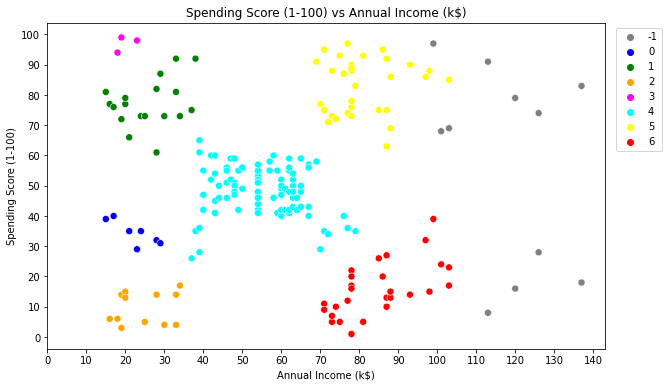

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="Cluster_label",  
                 palette=['gray','blue','green','orange','magenta', 'cyan', 'yellow', 'red'],
                legend='full',data = dbscan_cluster ,s = 50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.legend(bbox_to_anchor=(1.01,1))
plt.xticks(range(0,141,10))
plt.yticks(range(0,101,10))
plt.show()

**Hierarchical Clustering algorithm**

In [41]:
import scipy.cluster.hierarchy as hc

In [42]:
df_hc = df.iloc[:,3:].values

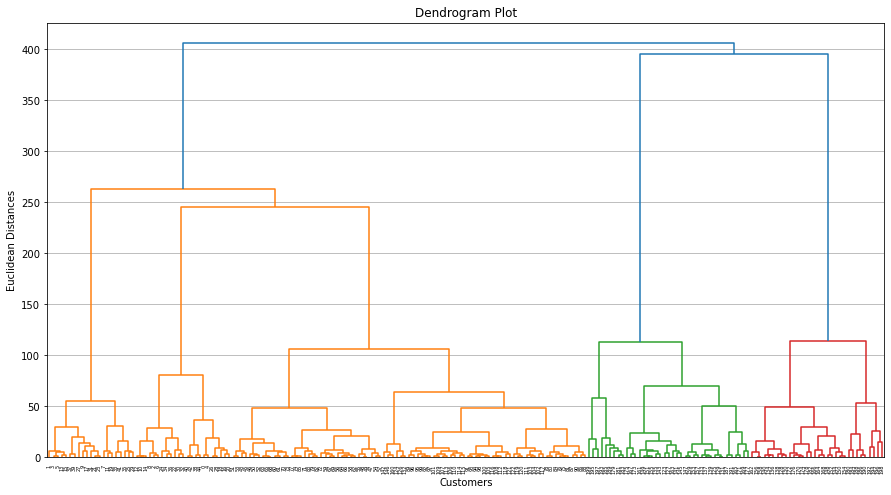

In [47]:
plt.figure(figsize=(15,8))
dendro = hc.dendrogram(hc.linkage(x, method='ward'))
plt.title("Dendrogram Plot")
plt.ylabel("Euclidean Distances")
plt.xlabel("Customers")
plt.grid(axis = 'y')
plt.show()

**After checking the longest line in the diagram we conclude that the number of clusters will be 5.**

In [48]:
from sklearn.cluster import AgglomerativeClustering

In [83]:
hc_model = AgglomerativeClustering(n_clusters=5)
hc_predict = hc_model.fit_predict(df_hc)

In [84]:
final_hc = df.copy()
final_hc['Cluster'] = hc_predict
final_hc

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


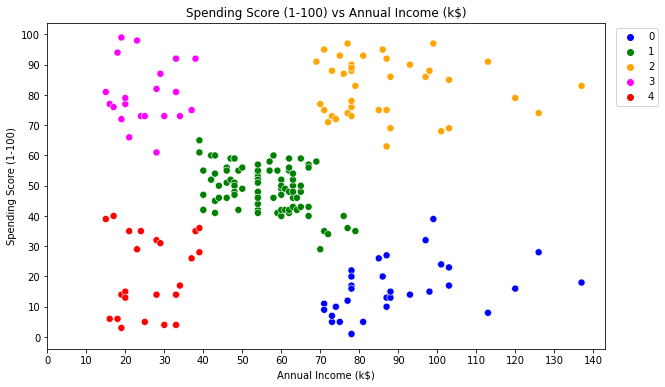

In [85]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="Cluster",  
                 palette=['blue','green','orange','magenta','red'],
                legend='full',data = final_hc ,s = 50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.legend(bbox_to_anchor=(1.01,1))
plt.xticks(range(0,141,10))
plt.yticks(range(0,101,10))
plt.show()

In [89]:
print('Silhouette Score for Hieararchial Clustering:'+str(round(silhouette_score(df_hc,hc_predict,metric='euclidean'), 2)))

Silhouette Score for Hieararchial Clustering:0.55


**Mean Shift Clustering**

In [116]:
from sklearn.cluster import MeanShift, estimate_bandwidth

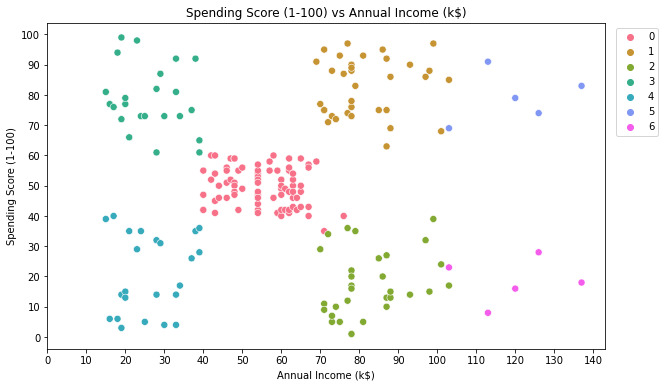

In [133]:
df_mean_shift = df.copy()

bandwidth = estimate_bandwidth(df_mean_shift.iloc[:,3:].values, quantile=0.1)
ms_model = MeanShift(bandwidth=bandwidth).fit(df_mean_shift.iloc[:,3:].values)

df_mean_shift['Labels'] = ms_model.labels_

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="Labels",  
                 palette=sns.color_palette("husl", np.unique(ms_model.labels_).shape[0]),
                legend='full',data = df_mean_shift ,s = 50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.legend(bbox_to_anchor=(1.01,1))
plt.xticks(range(0,141,10))
plt.yticks(range(0,101,10))
plt.show()

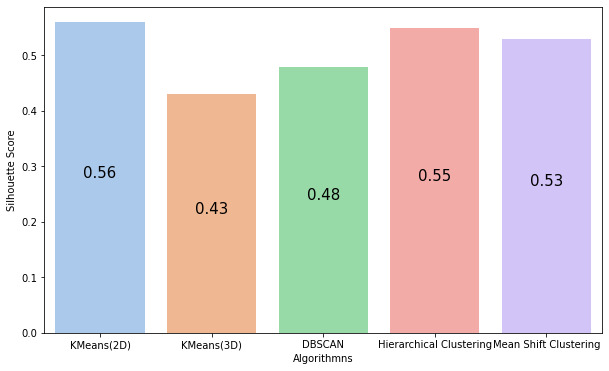

In [135]:
## Comparing all the silhouette score for the algorithmns used above

"""print('Silhouette Score for KMeans(2D):'+str(round(silhouette_score(df_n,y_5,metric='euclidean'), 2)))
print('Silhouette Score for KMeans(3D):'+str(round(silhouette_score(df_3d,y_n6_3d,metric='euclidean'), 2)))
print('Silhouette Score for DBSCAN:'+str(round(silhouette_score(x,dbs_cluster_1.labels_,metric='euclidean'), 2)))
print('Silhouette Score for Hieararchial Clustering:'+str(round(silhouette_score(df_hc,hc_predict,metric='euclidean'), 2)))"""


algorithmns = ['KMeans(2D)', 'KMeans(3D)', 'DBSCAN', 'Hierarchical Clustering', 'Mean Shift Clustering']
Silhouette_Score = [ round(silhouette_score(df_n,y_5,metric='euclidean'), 2),
                     round(silhouette_score(df_3d,y_n6_3d,metric='euclidean'), 2),
                     round(silhouette_score(x,dbs_cluster_1.labels_,metric='euclidean'), 2),
                     round(silhouette_score(df_hc,hc_predict,metric='euclidean'), 2),
                    round(silhouette_score(df_mean_shift.iloc[:,3:].values,ms_model.labels_,metric='euclidean'), 2)
                   ]
plt.figure(figsize=(10,6))
sns.barplot(x = algorithmns, y=Silhouette_Score, palette="pastel")
for i, v in enumerate(Silhouette_Score):
    plt.text(i, v/2, str(v), ha='center', color='black', size = 15)
plt.xlabel("Algorithmns")
plt.ylabel("Silhouette Score")
plt.show()

y_5 = km_5.fit_predict(df_n)                                            KMEANS 2D
y_n6_3d = km_3d.fit_predict(df_3d)                                      KMEANS 3D
dbs_cluster_1 = DBSCAN(eps=9, min_samples=3).fit(x)                     DBSCAN
hc_predict = hc_model.fit_predict(df_hc)                                Hieararchial Clustering